In [1]:
import seaborn as sns
import pandas as pd 
import re
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv.search") 
data['timestamp'].apply(lambda row: str(row))
data["act_sparsity"] = data["experiment"].apply(lambda x: float(re.findall(r"\d+.\d+", x.split("__")[1].split("_")[1])[0]))
data["method_name"] = data["experiment"].apply(lambda x: x.split("__")[1].split("_")[0])


In [2]:
def format_plt(ax, title, xlabel, ylabel):
    plt.sca(ax)
    plt.box(False)
    plt.tick_params(color="#222222", labelcolor="#222222")
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
    if title:
        plt.title(title)

In [3]:
dataset = "cifar10"

# Some processing
# Some processing
plot_df = data
plot_df['test_acc'] *= 100
plot_df['test_acc_pp'] *= 100
plot_df['train_acc'] *= 100
plot_df["total_time"] = plot_df["train_time"] + plot_df["prune_time"]
plot_df["sparsity"] = plot_df["n_params"] / plot_df["n_params_full"] * 100
plot_df["test_acc_gap"] = (plot_df["test_acc"] - plot_df["test_acc"].max())
plot_df["total_time_cum"] = plot_df.groupby(['experiment', 'timestamp'])['total_time'].apply(lambda x: x.cumsum())
plot_df["flop_save"] = plot_df["flops"] / 1258651648 * 100


In [44]:
# plot_df = plot_df[plot_df["act_sparsity"] == 0.3]
df_max = plot_df[plot_df["epoch"] == 0].groupby(["method_name", "act_sparsity"]).max().filter(["test_acc_pp","test_acc", "sparsity", "flop_save", "act_sparsity", "flops", "method_name", "prune_time", "n_params_full"])
df_max.reset_index(inplace=True)  
df_max

,method_name,act_sparsity,test_acc_pp,test_acc,sparsity,flop_save,flops,prune_time,n_params_full
0,count,0.20,93.30,93.30,99.99,100.13,"1,260,322,816.00",0.27,"15,253,578.00"
1,count,0.30,93.30,93.30,99.99,100.13,"1,260,322,816.00",0.26,"15,253,578.00"
2,count,0.50,93.30,93.30,99.99,100.13,"1,260,322,816.00",0.28,"15,253,578.00"
3,count,0.70,93.25,93.25,99.95,100.13,"1,260,281,856.00",0.31,"15,253,578.00"
4,count,0.80,93.24,93.24,99.89,100.12,"1,260,208,128.00",0.29,"15,253,578.00"
5,grad,0.05,93.29,93.29,99.74,100.11,"1,260,032,000.00",0.29,"15,253,578.00"
6,grad,0.10,93.31,93.31,99.45,100.08,"1,259,687,936.00",0.30,"15,253,578.00"
7,grad,0.20,93.11,93.11,98.99,100.04,"1,259,126,784.00",0.25,"15,253,578.00"
8,grad,0.30,92.79,92.79,98.70,100.01,"1,258,782,720.00",0.28,"15,253,578.00"
9,grad,0.40,92.26,92.26,98.52,99.99,"1,258,565,632.00",0.26,"15,253,578.00"


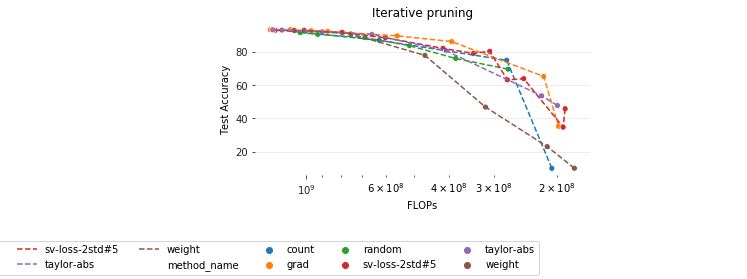

In [35]:
fig = plt.figure()
ax= sns.scatterplot(x="flops", y="test_acc", hue="method_name", data=df_max)
ax2= sns.lineplot(x="flops", y="test_acc", hue="method_name", data=df_max)
for l in ax2.lines:
    l.set_linestyle("--")
ax2.get_legend().set_visible(False)

# ax.set_ylim([60, 95])

handles, labels = plt.gca().get_legend_handles_labels()
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "SV" in t[1] else -1))
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "Fine" in t[1] else -1))

format_plt(plt.gca(), f"Iterative pruning", "FLOPs", "Test Accuracy")
plt.gca().invert_xaxis()
plt.xscale("log")

fig.subplots_adjust(bottom=.35)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.40, 0.15), ncol=7)
# plt.savefig(f".pdf", bbox_inches='tight')
